# Importing...

In [1]:
import pandas as pd

In [2]:
import seaborn as sns

In [3]:
import numpy as np

In [4]:
from sklearn.model_selection import train_test_split

In [5]:
from sklearn.tree import DecisionTreeRegressor

In [6]:
def calculate_rmse(predictions, actuals):
    if(len(predictions) != len(actuals)):
        raise Exception("The amount of predictions did not equal the amount of actuals")
    
    return (((predictions - actuals) ** 2).sum() / len(actuals)) ** (1/2)

In [7]:
penguins = sns.load_dataset("penguins").dropna()

# Training a decision tree to predict a penguin's body mass based on their characteristics...

Splitting the dataset and making a decision tree regressor...

In [8]:
penguins_train, penguins_test = train_test_split(penguins, test_size=0.3, random_state=42, stratify=penguins['species'])
print(penguins_train.shape, penguins_test.shape)

(233, 7) (100, 7)


In [14]:
features= ['bill_length_mm', 'flipper_length_mm']
dt_regression = DecisionTreeRegressor(max_depth = 2)
dt_regression.fit(penguins_train[features], penguins_train['body_mass_g'])

DecisionTreeRegressor(max_depth=1)

In [15]:
predictionsOnTrainset = dt_regression.predict(penguins_train[features])
predictionsOnTestset = dt_regression.predict(penguins_test[features])

In [16]:
rmseTrain = calculate_rmse(predictionsOnTrainset, penguins_train.body_mass_g)
rmseTest = calculate_rmse(predictionsOnTestset, penguins_test.body_mass_g)

print("RMSE on training set " + str(rmseTrain))
print("Normalised RMSE on training set " + str(rmseTrain / (penguins_train.body_mass_g.max() - penguins_train.body_mass_g.min())))
print("RMSE on test set " + str(rmseTest))
print("Normalised RMSE on test set " + str(rmseTest / (penguins_test.body_mass_g.max() - penguins_test.body_mass_g.min())))

RMSE on training set 459.61296197810896
Normalised RMSE on training set 0.13518028293473794
RMSE on test set 528.3636519489469
Normalised RMSE on test set 0.16773449268220536


I expected the training set to be more accurate by a lot. It was more accurate, but the difference between the accuracies isn't big.

## Making a plottree...

In [17]:
from sklearn import tree
import graphviz

def plot_tree_regression(model, features):
    # Generate plot data
    dot_data = tree.export_graphviz(model, out_file=None, 
                          feature_names=features,  
                          filled=True, rounded=True,  
                          special_characters=True)  

    # Turn into graph using graphviz
    graph = graphviz.Source(dot_data)  

    # Write out a pdf
    graph.render("decision_tree")

    # Display in the notebook
    return graph 

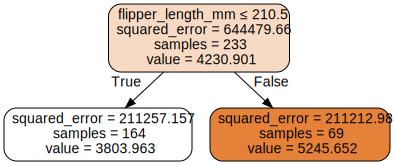

In [18]:
plot_tree_regression(dt_regression, features)